<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">The Spectral Element Method - Numerical Integration - The Gauss-Lobatto-Legendre approach</div>
        </div>
    </div>
</div>

The following notebook presents a basic integration scheme that we're going to use in the Spectral Element Code to calculate the entries of the mass and stiffness matrices.

**Fundamental principal:**<br>
Replace the function $f(x)$ that we want to integrate by a polynomial approximation that can be integrated analytically.

As interpolating functions we use the Lagrange polynomials $l_i$ and obtain the following integration scheme for an arbitrary function $f(x)$ defined on the interval $[-1,1]$ :
\begin{eqnarray*} \int_{-1}^1 f(x) \ dx \approx \int _{-1}^1 P_N(x) dx = \sum_{i=1}^{N+1} w_i f(x_i) \end{eqnarray*}
with 
\begin{eqnarray*}
    P_N(x)= \sum_{i=1}^{N+1} f(x_i) \ l_i^{(N)}(x).
\end{eqnarray*}
As collocation points we use the Gauss-Lobatto-Legendre points $x_i$ and the corresponding weights that are needed to evaluate the integral are calculated as follows:
\begin{eqnarray*} w_i= \int_{-1}^1 l_i^{(N)}(x) \ dx \end{eqnarray*}.


We want to investigate the performance of
the numerical integration scheme. You can use the `gll()` routine to
obtain the differentiation weights $w_i$ for an
arbitrary function f(x) and the relevant integration points $x_i$. 

### 1. Numerical integration of an arbritrary function:
Define a function $f(x)$
of your choice and calculate analytically the
integral $\int f(x) \ dx$ for the interval $[−1, 1]$. Perform the integration numerically and compare the results. 

### 2. The order of integration
Take a closer look and modify the function and the order of the numerical integration.



In [18]:
# This is a configuration step for the exercise. Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

# Prettier plots.
plt.style.use('ggplot')

In [19]:
def lagrange2(N, i, x, xi):
    """
    Program to calculate  Lagrange polynomial for order N
    and polynomial i [0, N] at location x at given collacation points xi
    (not necessarily the GLL-points)
    """
    fac = 1
    for j in range(-1, N):
        if j != i:
            fac = fac * ((x - xi[j + 1]) / (xi[i + 1] - xi[j + 1]))
    return fac

In [20]:
def gll(N):
    """
    Returns GLL (Gauss Lobato Legendre module with collocation points and
    weights)
    """
    # Initialization of integration weights and collocation points
    # [xi, weights] =  gll(N)
    # Values taken from Diploma Thesis Bernhard Schuberth
    if N == 2:
        xi = [-1.0, 0.0, 1.0]
        weights = [0.33333333, 1.33333333, 0.33333333]
    elif N == 3:
        xi = [-1.0, -0.447213595499957, 0.447213595499957, 1.0]
        weights = [0.1666666667, 0.833333333, 0.833333333, 0.1666666666]
    elif N == 4:
        xi = [-1.0, -0.6546536707079772, 0.0, 0.6546536707079772, 1.0]
        weights = [0.1, 0.544444444, 0.711111111, 0.544444444, 0.1]
    elif N == 5:
        xi = [-1.0, -0.7650553239294647, -0.285231516480645, 0.285231516480645,
              0.7650553239294647, 1.0]
        weights = [0.0666666666666667,  0.3784749562978470,
                   0.5548583770354862, 0.5548583770354862, 0.3784749562978470,
                   0.0666666666666667]
    elif N == 6:
        xi = [-1.0, -0.8302238962785670, -0.4688487934707142, 0.0,
              0.4688487934707142, 0.8302238962785670, 1.0]
        weights = [0.0476190476190476, 0.2768260473615659, 0.4317453812098627,
                   0.4876190476190476, 0.4317453812098627, 0.2768260473615659,
                   0.0476190476190476]
    elif N == 7:
        xi = [-1.0, -0.8717401485096066, -0.5917001814331423,
              -0.2092992179024789, 0.2092992179024789, 0.5917001814331423,
              0.8717401485096066, 1.0]
        weights = [0.0357142857142857, 0.2107042271435061, 0.3411226924835044,
                   0.4124587946587038, 0.4124587946587038, 0.3411226924835044,
                   0.2107042271435061, 0.0357142857142857]
    elif N == 8:
        xi = [-1.0, -0.8997579954114602, -0.6771862795107377,
              -0.3631174638261782, 0.0, 0.3631174638261782,
              0.6771862795107377, 0.8997579954114602, 1.0]
        weights = [0.0277777777777778, 0.1654953615608055, 0.2745387125001617,
                   0.3464285109730463, 0.3715192743764172, 0.3464285109730463,
                   0.2745387125001617, 0.1654953615608055, 0.0277777777777778]
    elif N == 9:
        xi = [-1.0, -0.9195339081664589, -0.7387738651055050,
              -0.4779249498104445, -0.1652789576663870, 0.1652789576663870,
              0.4779249498104445, 0.7387738651055050, 0.9195339081664589, 1.0]
        weights = [0.0222222222222222, 0.1333059908510701, 0.2248893420631264,
                   0.2920426836796838, 0.3275397611838976, 0.3275397611838976,
                   0.2920426836796838, 0.2248893420631264, 0.1333059908510701,
                   0.0222222222222222]
    elif N == 10:
        xi = [-1.0, -0.9340014304080592, -0.7844834736631444,
              -0.5652353269962050, -0.2957581355869394, 0.0,
              0.2957581355869394, 0.5652353269962050, 0.7844834736631444,
              0.9340014304080592, 1.0]
        weights = [0.0181818181818182, 0.1096122732669949, 0.1871698817803052,
                   0.2480481042640284, 0.2868791247790080, 0.3002175954556907,
                   0.2868791247790080, 0.2480481042640284, 0.1871698817803052,
                   0.1096122732669949, 0.0181818181818182]
    elif N == 11:
        xi = [-1.0, -0.9448992722228822, -0.8192793216440067,
              -0.6328761530318606, -0.3995309409653489, -0.1365529328549276,
              0.1365529328549276, 0.3995309409653489, 0.6328761530318606,
              0.8192793216440067, 0.9448992722228822, 1.0]
        weights = [0.0151515151515152, 0.0916845174131962, 0.1579747055643701,
                   0.2125084177610211, 0.2512756031992013, 0.2714052409106962,
                   0.2714052409106962, 0.2512756031992013, 0.2125084177610211,
                   0.1579747055643701, 0.0916845174131962, 0.0151515151515152]
    elif N == 12:
        xi = [-1.0, -0.9533098466421639, -0.8463475646518723,
              -0.6861884690817575, -0.4829098210913362, -0.2492869301062400,
              0.0, 0.2492869301062400, 0.4829098210913362,
              0.6861884690817575, 0.8463475646518723, 0.9533098466421639,
              1.0]
        weights = [0.0128205128205128, 0.0778016867468189, 0.1349819266896083,
                   0.1836468652035501, 0.2207677935661101, 0.2440157903066763,
                   0.2519308493334467, 0.2440157903066763, 0.2207677935661101,
                   0.1836468652035501, 0.1349819266896083, 0.0778016867468189,
                   0.0128205128205128]
    else:
        raise NotImplementedError

    return xi, weights

Solution of the analytical integral: 0.666667
Solution of the numerical integral: 0.666668
error: 0.000199401%


<IPython.core.display.Javascript object>


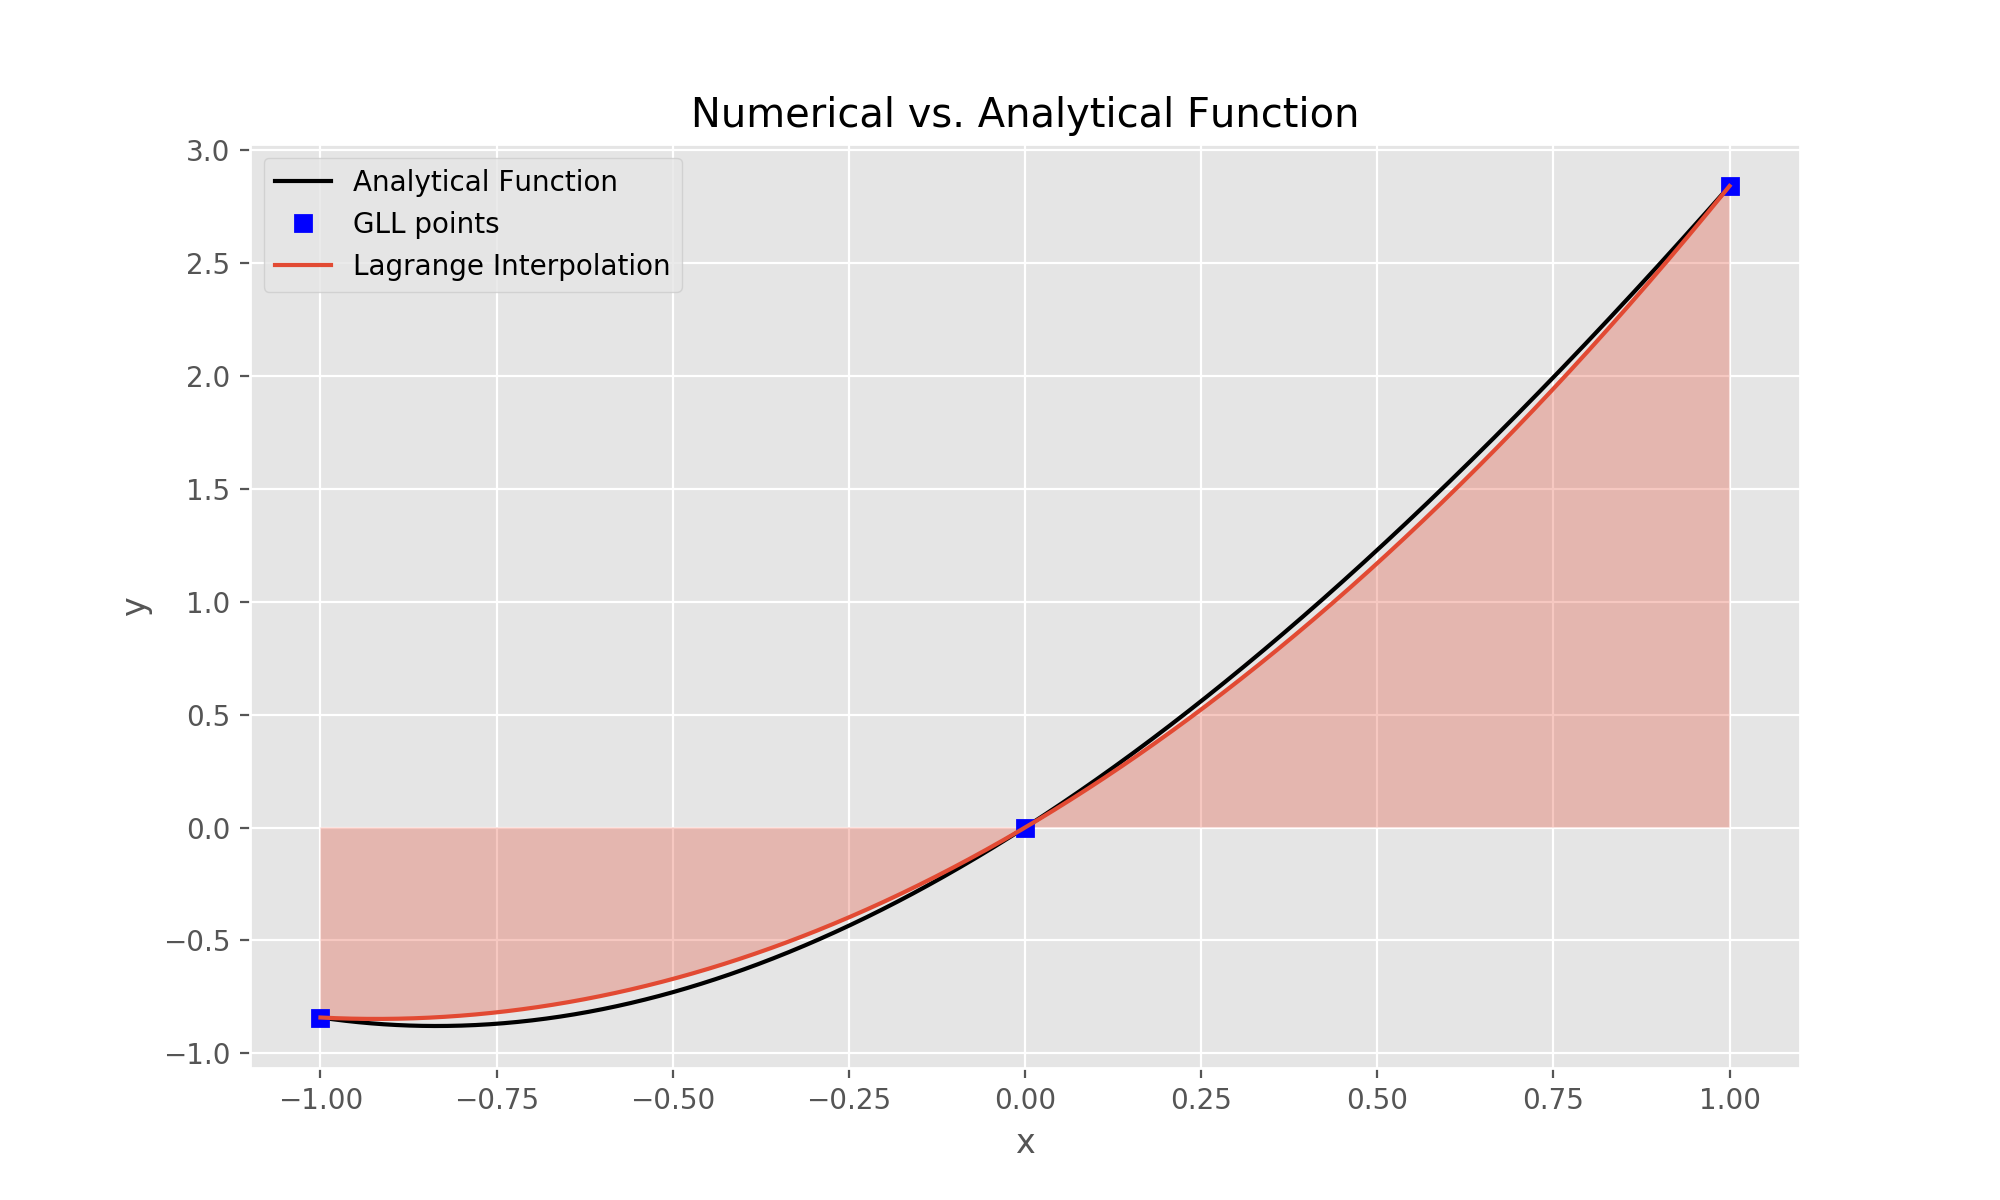

In [30]:
# Exercise for Gauss integration
n = 1000 
x = np.linspace(-1, 1, n)

# MODIFY f and intf to test different functions!
#f = np.sin(x * np.pi) 
f = x + x * x + np.sin(x)
# f = 0.5*(x**2) + 0.33333*(x**5)

# Analytical value of the DEFINITE integral from -1 to 1
#intf = 1.0 / np.pi * (-np.cos(1.0 * np.pi) + np.cos(-1.0 * np.pi))
intf = 2./3.
# intf = 1./3.

# Choose order
N = 2

# Get integration points and weights from the gll routine
xi, w = gll(N)

# Initialize function at points xi
fi = np.interp(xi, x, f)

################################################
# Evaluate integral
intfn = 0
for i in range(len(w)):
    intfn = intfn + w[i] * fi[i]
################################################    


# Calculate Lagrange Interpolant for plotting purposes.
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange2(N, j, x[i], xi)
s = np.zeros_like(x)
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
    
error = (np.abs(intf - intfn) / np.abs(intf)) * 100
# error = np.sum((np.abs(f - s))) / np.sum(np.abs(f)) * 100
    
print('Solution of the analytical integral: %g' % intf)
print('Solution of the numerical integral: %g' % intfn)
print('error: %g%%' % error)

# -------------------
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, f, 'k-', label='Analytical Function')

plt.plot(xi, fi, 'bs', label='GLL points')
plt.plot(x, s, label='Lagrange Interpolation')
plt.fill_between(x, s, np.zeros_like(x), alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs. Analytical Function')

plt.legend()
plt.show()